

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.


## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [1]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.DataFrame(pd.read_csv("petrol.csv"))
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [3]:
df1=df
df.shape

(48, 5)

In [4]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [6]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [7]:
sns.set(rc={'figure.figsize':('11.7,8.27')})

<AxesSubplot:>

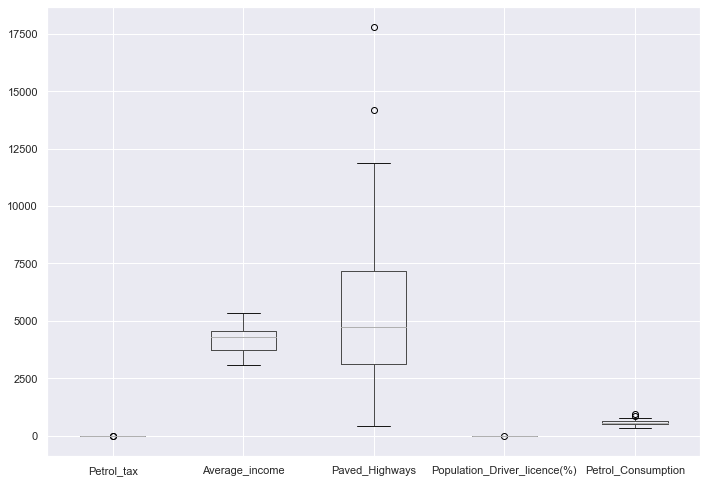

In [8]:
df.boxplot()

As we can see in above boxplot there are outliers in our dataset so we are capping the outliers in dataset.
we are capping the outliers by IQR(Interquartile Range) Method.

#### Petrol_tax

In [9]:
#Finding the IQR
Q1 = df['Petrol_tax'].quantile(0.25)
Q3 = df['Petrol_tax'].quantile(0.75)
IQR =Q3-Q1
print('IQR of Petrol Tax =', IQR)
#Finding upper and lower limit
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
# Finding Outliers
df1=df1[((df1['Petrol_tax']>lower_limit)&(df1['Petrol_tax']<upper_limit))]
df1.shape

IQR of Petrol Tax = 1.125


(46, 5)

#### Average_income

In [10]:
#Finding the IQR
Q1 = df1['Average_income'].quantile(0.25)
Q3 = df1['Average_income'].quantile(0.75)
IQR =Q3-Q1
print('IQR of Average_income =', IQR)
#Finding upper and lower limit
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
# Finding Outliers
df1=df1[((df1['Average_income']>lower_limit)&(df1['Average_income']<upper_limit))]
df1.shape

IQR of Average_income = 831.5


(46, 5)

#### Paved_Highways

In [11]:
#Finding the IQR
Q1 = df['Paved_Highways'].quantile(0.25)
Q3 = df['Paved_Highways'].quantile(0.75)
IQR =Q3-Q1
print('IQR of Paved_Highways =', IQR)
#Finding upper and lower limit
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
# Finding Outliers
# Finding Outliers
df1=df1[(df1['Paved_Highways']>lower_limit)&(df1['Paved_Highways']<upper_limit)]
df1.shape

IQR of Paved_Highways = 4045.75


(45, 5)

#### Population_Driver_licence(%)

In [12]:
#Finding the IQR
Q1 = df['Population_Driver_licence(%)'].quantile(0.25)
Q3 = df['Population_Driver_licence(%)'].quantile(0.75)
IQR =Q3-Q1
print('IQR of Population_Driver_licence(%) =', IQR)
#Finding upper and lower limit
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
# Finding Outliers
df1=df1[((df1['Population_Driver_licence(%)']>lower_limit)&(df1['Population_Driver_licence(%)']<upper_limit))]
df1.shape

IQR of Population_Driver_licence(%) = 0.06549999999999989


(44, 5)

#### Petrol_Consumption

In [13]:
#Finding the IQR
Q1 = df['Petrol_Consumption'].quantile(0.25)
Q3 = df['Petrol_Consumption'].quantile(0.75)
IQR =Q3-Q1
print('IQR of Petrol_Consumption =', IQR)
#Finding upper and lower limit
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
# Finding Outliers
# Finding Outliers
df1=df1[(df1['Petrol_Consumption']>lower_limit)&(df1['Petrol_Consumption']<upper_limit)]
df1.shape

IQR of Petrol_Consumption = 123.25


(43, 5)

<AxesSubplot:>

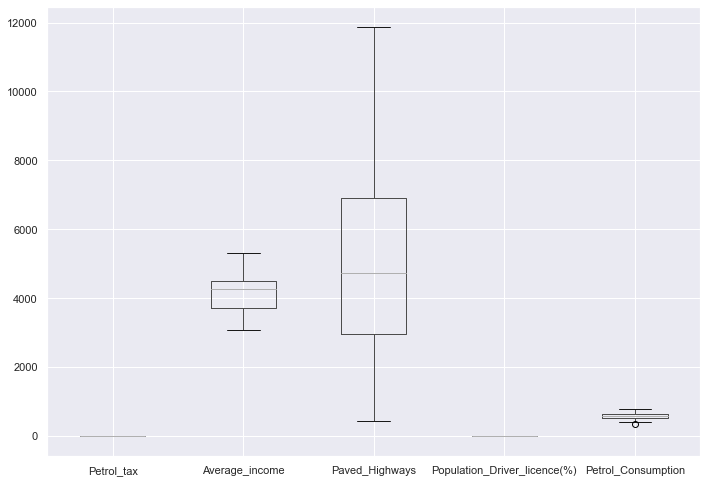

In [14]:
df1.boxplot()

As we can see that we remove all outliers from our dataset by IQR method.

# Question 3 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

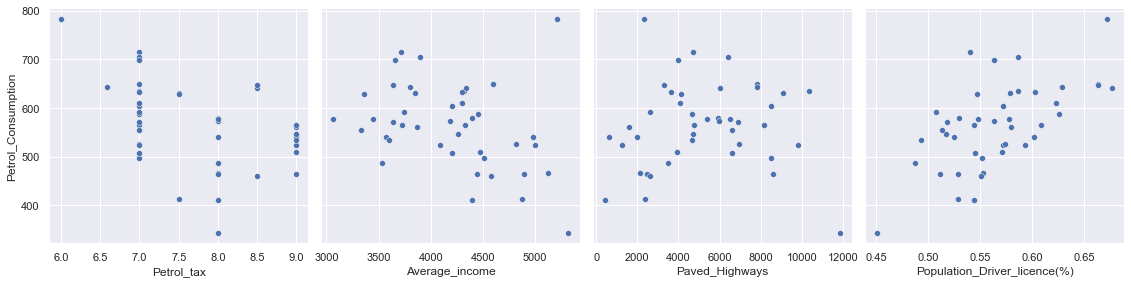

In [15]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(df1, x_vars=['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)'], y_vars='Petrol_Consumption', height=4, aspect=1, kind='scatter')
plt.show()

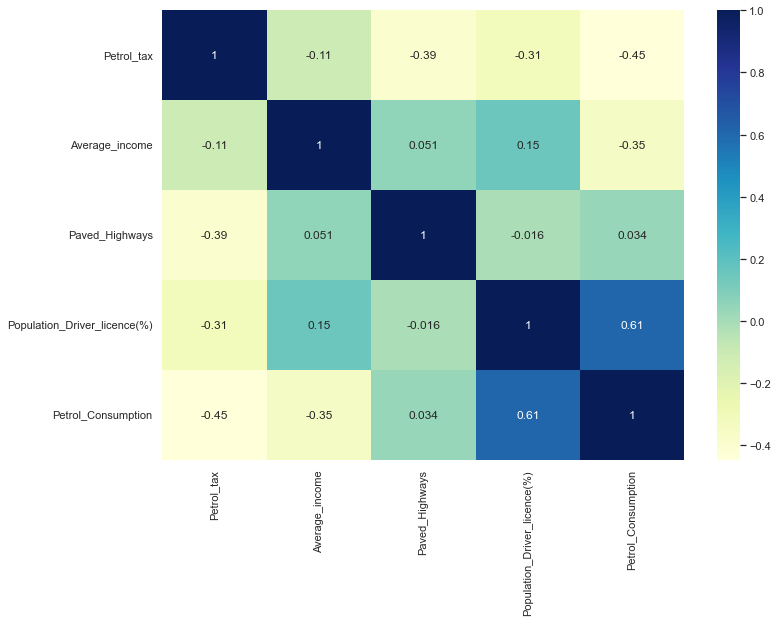

In [16]:
sns.heatmap(df1.corr(), cmap="YlGnBu", annot = True)
plt.show()

From the above Correlation Heatmap we can see that petrol consumption is highly correlated with 
the population driver licence (%) so we choose that column for our model.

In [17]:
y=df1['Petrol_Consumption']
X=df1['Population_Driver_licence(%)']

# Question 4 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2,random_state=0)

In [19]:
print(X_train.shape,y_train.shape)

(34,) (34,)


In [20]:
print(X_test.shape,y_test.shape)

(9,) (9,)


In [21]:
X_train.shape

(34,)

# Question 5 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [22]:
# Model Building 
import statsmodels.api as sm

#Fitting the model 
model=sm.OLS(y_train,X_train).fit()

In [23]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     Petrol_Consumption   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              2482.
Date:                Sun, 19 Jun 2022   Prob (F-statistic):                    1.22e-32
Time:                        13:09:16   Log-Likelihood:                         -190.38
No. Observations:                  34   AIC:                                      382.8
Df Residuals:                      33   BIC:                                      384.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

# R-Square 

# Question 6 - Evaluate the model 
Calculate the accuracy score for the above model.

In [24]:
# Predict the y values corresponding to X_test
y_pred = model.predict(X_test)

In [25]:
# Checking the R squared on test set
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
r_squared

0.035835997697743704

# Repeat the same Multi linear regression modelling by adding Population_Driver_licence(%), Income and Highway features
Find R2 

In [26]:
Y=df1.Petrol_Consumption
X=df1.drop(['Petrol_Consumption'],axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state =0)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(30, 4) (30,)
(13, 4) (13,)


In [27]:
model=sm.OLS(Y_train,X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     Petrol_Consumption   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              616.2
Date:                Sun, 19 Jun 2022   Prob (F-statistic):                    2.42e-25
Time:                        13:09:16   Log-Likelihood:                         -164.82
No. Observations:                  30   AIC:                                      337.6
Df Residuals:                      26   BIC:                                      343.2
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [28]:
# Predict the y values corresponding to X_test_sm
Y_pred = model.predict(X_test)

In [29]:
# Checking the R squared on test set
from sklearn.metrics import r2_score
r_squared = r2_score(Y_test, Y_pred)
r_squared

0.38719268920673666

# Question 8: Print the coefficients of the multilinear regression model

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [31]:
regressor.coef_

array([-4.85092410e+01, -8.60668301e-02, -4.24564300e-03,  8.39706647e+02])

# Question 9 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

When there is only one independent variable Population_Driver_licence(%) in our regression model 
for train data the value for r square in model summery is 0.987 and 
for test data the value for r square is 0.035.

When we run the regression model on all independent variable like Petrol_tax, Average_income, Paved_Highways and Population_Driver_licence(%)
for train data the value for r square in model summery is 0.990 and 
for test data the value for r square is 0.387.
        
As we have very less data for analysis therefore r square value is severely affected.
